# Cálculo de la Vida del Yacimiento

## Regla de Taylor

https://minewiki.engineering.queensu.ca/mediawiki/index.php/Estimation_of_the_potential_production_rate

H. K. Taylor a mining engineer working with Placer Development Limited, proposed "Taylor's Law" at a mine valuation and feasibility study seminar in Spokane, Washington in 1976[1]. This rule was then published in 1977. Taylor realized the need for such a rule since the existing "supposedly optimum mining rate have long been estimated by elementary economic theory, usually by present-value methods, but it has been observed that many such exercises show a bias towards high rates of working that are unachievable or undesirable in practice."[1] The previous methods had led to inexperienced companies proposing mines with wildly unrealistic rates. Taylor based the emperical rule off of nearly 30 mining projects, mostly young mines. Taylor's rule was tested in 1984 by McSpadden and Schaap, who checked it against 45 open-pit copper deposits.[2] McSpadden and Schaap found the rule needed to be tweaked slightly, however this finding was due to the narrow range of their mine types compared to Taylor's wide range of mine types. 

\begin{equation}
Mine Life = 0.2 * \sqrt[4]{Tonneage}
\end{equation}

\begin{equation}
Production (T/day) = \frac{Tonneage } {MineLife * OperatingLife}
\end{equation}



In [38]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [48]:
def TaylorRuleofYacLife(t):
    '''
    Regla de Taylor para el cálculo de la vida del yacimiento
    t = Tonneage
    '''
    return 0.2 * ( t ** 0.25 )

def TaylorProductionRate(tonn, yacLife):
    '''
    Regla de Taylor para el cálculo de la tasa de producción
    '''
    return tonn / (yacLife * 350)

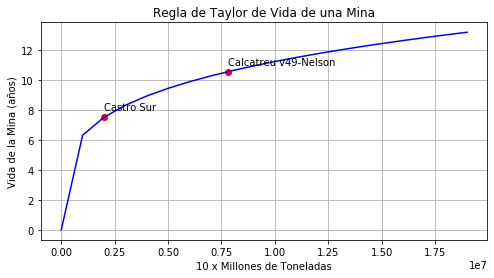

In [66]:
# calculo de diagrama de Taylor en función del tonelaje

tonnLst    = [ x * 10 ** 6 for x in range(0,20) ]  
yacLifeLst = [ TaylorRuleofYacLife(x) for x in tonnLst]

fig, ax = plt.subplots(figsize=(8,4))

ax.grid(True)
ax.set_title('Regla de Taylor de Vida de una Mina')
ax.set_xlabel('10 x Millones de Toneladas')
ax.set_ylabel('Vida de la Mina (años)')


# ESTO EN SU MOMENTO HABRA QUE BORRARLO
ax.plot(7830000, 10.58, 'ro')
ax.annotate("Calcatreu v49-Nelson", (7830000, 11))

ax.plot(2010000, 7.53, 'ro')
ax.annotate("Castro Sur", (2010000,8))
# /ESTO EN SU MOMENTO HABRA QUE BORRARLO

ax.plot(tonnLst, yacLifeLst, label='Distribución teórica (PDF)', color='blue', linestyle='solid')
ax.plot(7830000, 10.58);

## Entrada de Datos

In [74]:
# Aqui habría que poner una tabla, así se facilita la entrada de datos

wStockTonn = widgets.FloatText(
    value = 0,
    description='Reservas MT:',
    disabled=False
)

display(wStockTonn)



FloatText(value=0.0, description='Reservas MT:')

In [76]:
stockTonn = wStockTonn.value * 1000000

## Resultados por Regla de Taylor

In [77]:
yacLife  = TaylorRuleofYacLife(stockTonn)

prodRate = TaylorProductionRate(stockTonn, yacLife)

print(f"Vida del yacimiento (años): {yacLife:.2f} años (según regla de Taylor)")
print(f"Tasa de Producción por día: {prodRate:.2f} T/d")

Vida del yacimiento (años): 7.53 años (según regla de Taylor)
Tasa de Producción por día: 762.60 T/d


# Biblografía

Taylor, H.K., 1986, Rates of working mines; a simple rule of thumb: Transactions of the Institution of Mining and Metallurgy, v. 95, section A, p. 203-204. 